## DATAKIND - PIMA INDIANS DIABETES DATASET: IMPUTATION AND EDA

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import nan
import statsmodels.api as sm
import scipy as sp
mpl.rcParams['figure.figsize'] = (20,5)


In [2]:
!pip install pandas-profiling

In [8]:
from pandas_profiling import ProfileReport

## Missing Data

- 'Pregnancies' - 14.5% of the data is zero. It is unclear if this data means that these observations are true (no pregnancies), missing, or a combination. In the absence of insight into the quality of this data, I will assume that the zero values are valid and that they actually indicate zero pregnancies. 
          IMPUTE: NO

- 'Glucose' - While there are only 5 zeros, representing 0.7% of the observations, it is expected that plasma glucose would be > zero. Thus, it is safe to assume that these zero values represent missing data. I will impute the missing values  
          IMPUTE: YES

- 'BloodPressure' - 4.6% (35) of the data is zero. The population from which this data was gathered was living and thus all "BloodPressure' values should be > zero. I will impute missing values  
          IMPUTE: YES

- 'SkinThickness" - Nearly 1/3 (29.6%) of this data is zero. 'SkinThickness' ss a measure of tricep skinfold thickness and should be > zero. It is safe to assume these values are missing data and I will impute these missing values  
          IMPUTE: YES

- 'Insulin' - Nearly half of this data - 48.7% - is zero. While it has been speculated that a person with Type 1 diabetes might reach a serum insulin level of zero, other research suggests that serum insulin should never reach zero. Either way, I would not  expect that nearly half of the populatation would have a 2-hour serum insulin level equal to zero. Furthermore, only about 35% of this population has an 'Outcome' of 1, meaning they have diabetes and we would not expect a non-diabetic to havea serum insulin level of zero. Lastly, measuring serum insultin involves a blood test, which might not be readily available for members of the population. As such, there is ample evidence suggesting this data is missing, and not truly zero. I will impute the missing values.  
          IMPUTE: YES

- 'BMI' - No individual has a BMI of zero, yet 1.4% of this data is coded as zero. It is safe to assume that this data is missing and I will thus impute and backfill this missing data 
          IMPUTE: YES

## Non-Missing Data

- Two features had complete, non-zero data and were left intact: 'Age' and 'DiabetesPedigreeFunction'
- One feature, 'Outcome', was binary and left intact

### Imputation Approach

Categorize data into two groups: 'Outcome' = 1, 'Outcome' = 0. For each column, impute missing values by replacing with the mean of the respective group's column, excluding zeros

- In Excel, a new dataset was created
- Rows were categorized into groups by 'Outcome'
- The mean was calculated for each column, excluding zeros, for each categorized group
- Zeros were replaced by this mean
- The new dataset was then imported and analyzed here

### EDA

In [3]:
df2 = pd.read_excel(r'C:\Users\c_ara\OneDrive\Documents\Data Science\DataKind\DataDive-Mar2021\diabetes-pima-indians_imputed 1.xlsx', sheet_name = 'diabetes_mean-filled')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [4]:
df2.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.697358      72.428141      29.247042  157.003527   
std       3.369578   30.462008      12.106044       8.923908   88.860914   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      28.000000  130.287879   
75%       6.000000  141.000000      80.000000      33.000000  206.846154   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

             BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.00000                768.000000  768.000000  768.000000  
mean    32.44642                  0.471876   33.240885    0.348958  
std      6.87897                  0.331329   11.760232    0.476951  
min     18.20000                  0.078000   21.000000    0.000000  
25%     27.50000                  0.243750   24.000000    0.000000  
50%     32.05000                  0.372500   29.000000    0.000000  
75%     36.60000                  0.626250   41.000000    1.000000  
max     67.10000                  2.420000   81.000000    1.000000

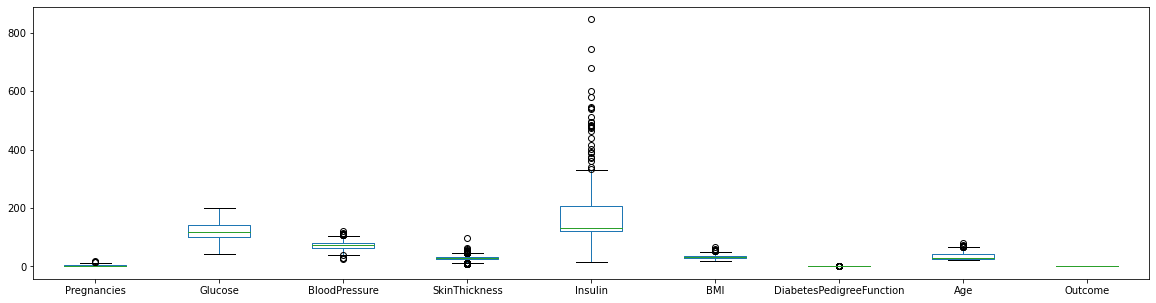

In [5]:
df2.plot(kind='box')

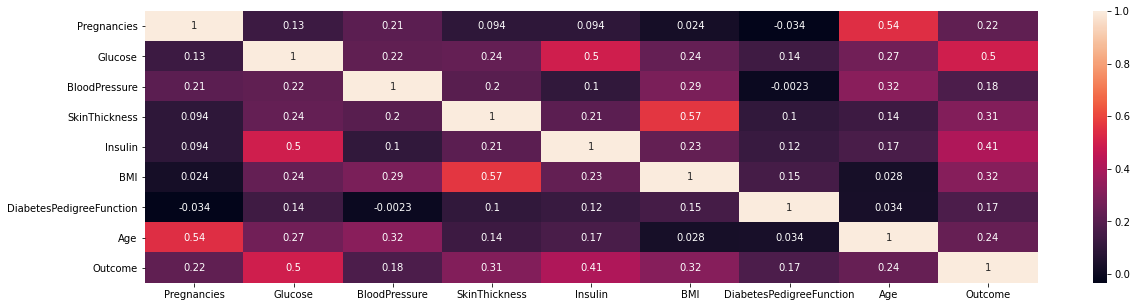

In [6]:
corr_diabetes_df2 = df2.corr()
sns.heatmap(corr_diabetes_df2, annot=True)
#plt.savefig(corr_diabetes_df2, bbox_inches='tight')

In [9]:
#EDA on df2 using Pandas Profiling
profile = ProfileReport(df2, title='Diabetes', explorative = True)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]